# Modelling Stellar Interiors: CoCalc Notebook



##### This lab will take place over four three-hour morning lab sessions, timetabled for Wednesdays at 10am-1pm during weeks 5-9. You are expected to complete the lab work on your own - working in groups is not permitted, and plagiarism is taken very seriously.

On completion of the tasks set out below, you will be required to hand in a full lab report via Turnitin by 11.59pm on Wednesday in week 12. This lab is worth 20% of the total marks available for the PHY213 module.

1. The code below provides solutions to the Lane Emden equation for generic values of *n*. Determine the value of $\xi$ when $\theta=0$ to three decimal places, and create a single plot of $\xi$ vs $\theta$ for values of *n*=0,1,2,3,4,5
2. Create plots of *M*, *P*, $\rho$ and *T* vs. *r* for the Standard Solar Model.
3. Using the solution to the Lane Emden equation, determine solutions for *M* vs. *r*, $\rho$ vs. *r*, *P* vs. *r* and *T* vs. *r*.
4. Determine which of the polytrope models with values of *n*=0,1,2,3,4 best describes the structure of the Sun. You should do this by plotting graphs of log density (in units of kg/m3), mass (in units of solar masses), log pressure (in units of N/m2) and log temperature (in units of K) versus radius (in units of solar radii) for all possible polytrope models and the Standard Solar Model (SSM).



In [1]:
import numpy as np

Enter your chosen polytropic index 5

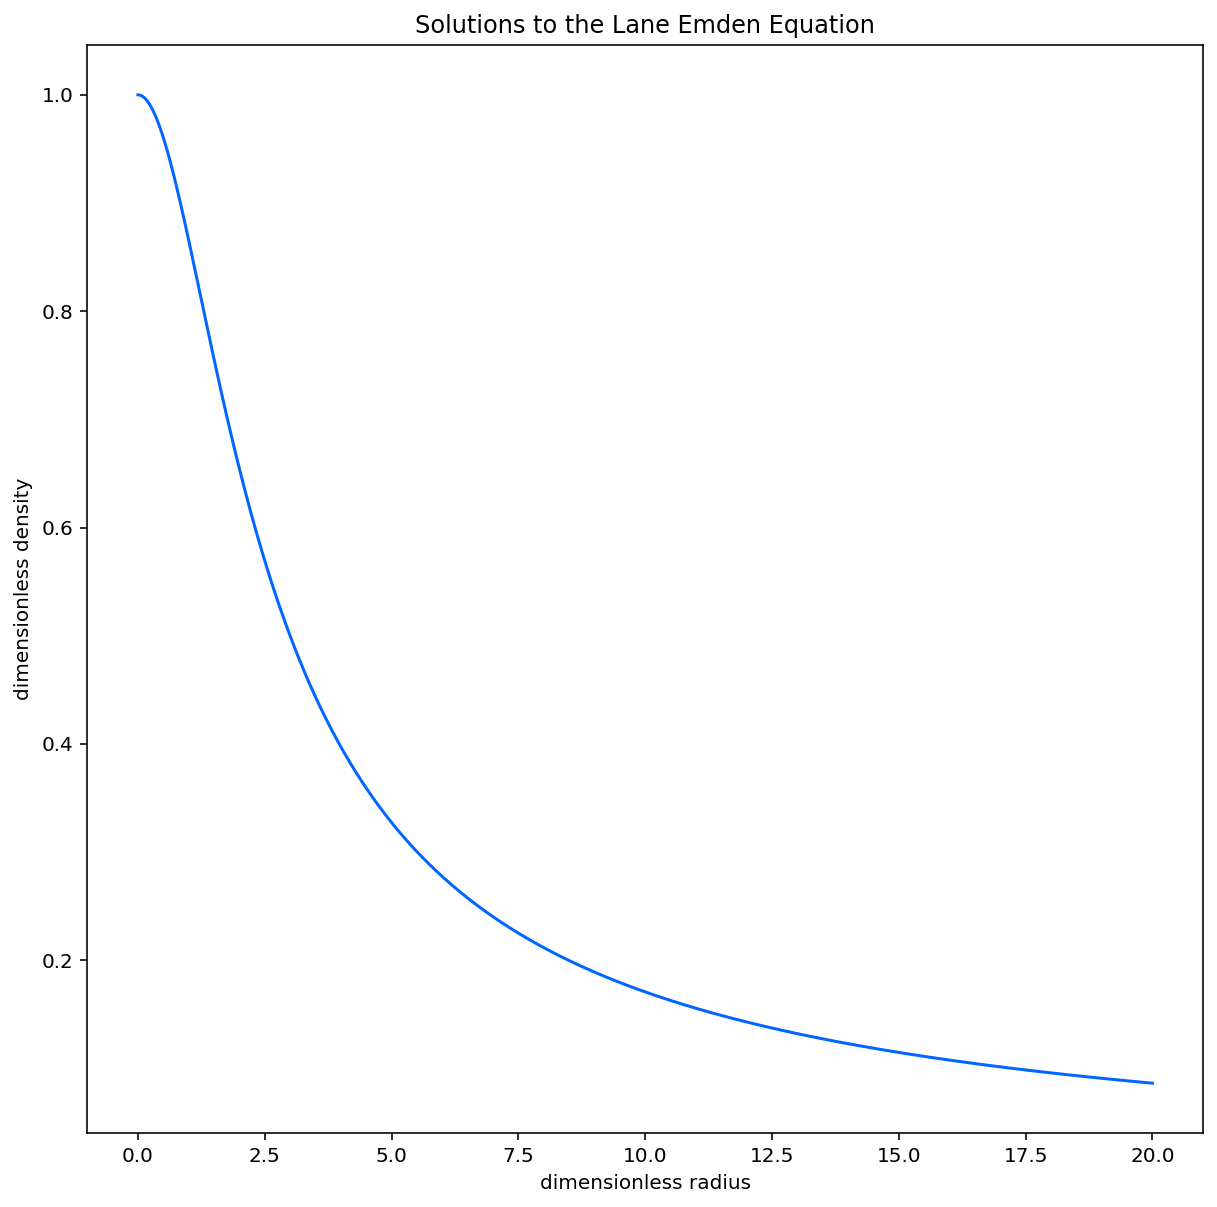

In [2]:
import numpy as np #importing required functions
import matplotlib.pyplot as plt #importing required functions

def lane_emden(n): # function to produce values of xi, theta and first derivative of xi
    xi_0=0.000001 # need to start out with a small but non-zero value of xi
    theta_0=1 # starting value of theta
    dtheta_0=0 # starting value of derivative of xi
    step=0.001 # step size in xi is 0.001
    # set up lists for xi, theta, dxi, populated with initial values
    xi=[xi_0]
    theta=[theta_0]
    dtheta=[dtheta_0]
    #set up initial values for incrementing process
    xi_i=xi[-1] # final value in list
    theta_i=theta[-1]
    dtheta_i=dtheta[-1]
    # next step is to use Eulerian method to generate subsequent values of xi, theta, dxi
    # we'll use a while loop for this, which cuts out as soon as theta becomes negative, as this will define the first value beyond the maximum radius of the star.
    # we want to ensure that we do calculate and store this last value, as we need it to determine the intercept value of xi when theta=0
    # we also want to include an alternative termination condition for n=5, for which theta doesn't cross the x-axis until xi=infinity
    while xi_i<20 and theta_i>=0:
        # need to determine new value of dtheta_i first of all
        dtheta_i=dtheta_i - step * ((2*dtheta_i/xi_i) + theta_i**n)
        # use new value of dtheta_i to determine new value of theta_i
        theta_i=theta_i + step * dtheta_i
        # increment xi
        xi_i=xi_i+step
        # append new values into the lists
        xi.append(xi_i)
        theta.append(theta_i)
        dtheta.append(dtheta_i)
    return xi, theta, dtheta # return the completed lists of xi, theta and dxi for the chosen value of n

nn = float(input("Enter your chosen polytropic index")) # select a value for n

xx_n,yy_n,grad_n=lane_emden(nn) # run the lane emden function for the specified value of n

plt.figure(figsize=[10,10])  # define size of plot window first of all
plt.plot(xx_n,yy_n,color='#0066ff')
# add labels
plt.xlabel('dimensionless radius')
plt.ylabel('dimensionless density')
plt.title('Solutions to the Lane Emden Equation')
# display plots with plt.show()
plt.show()


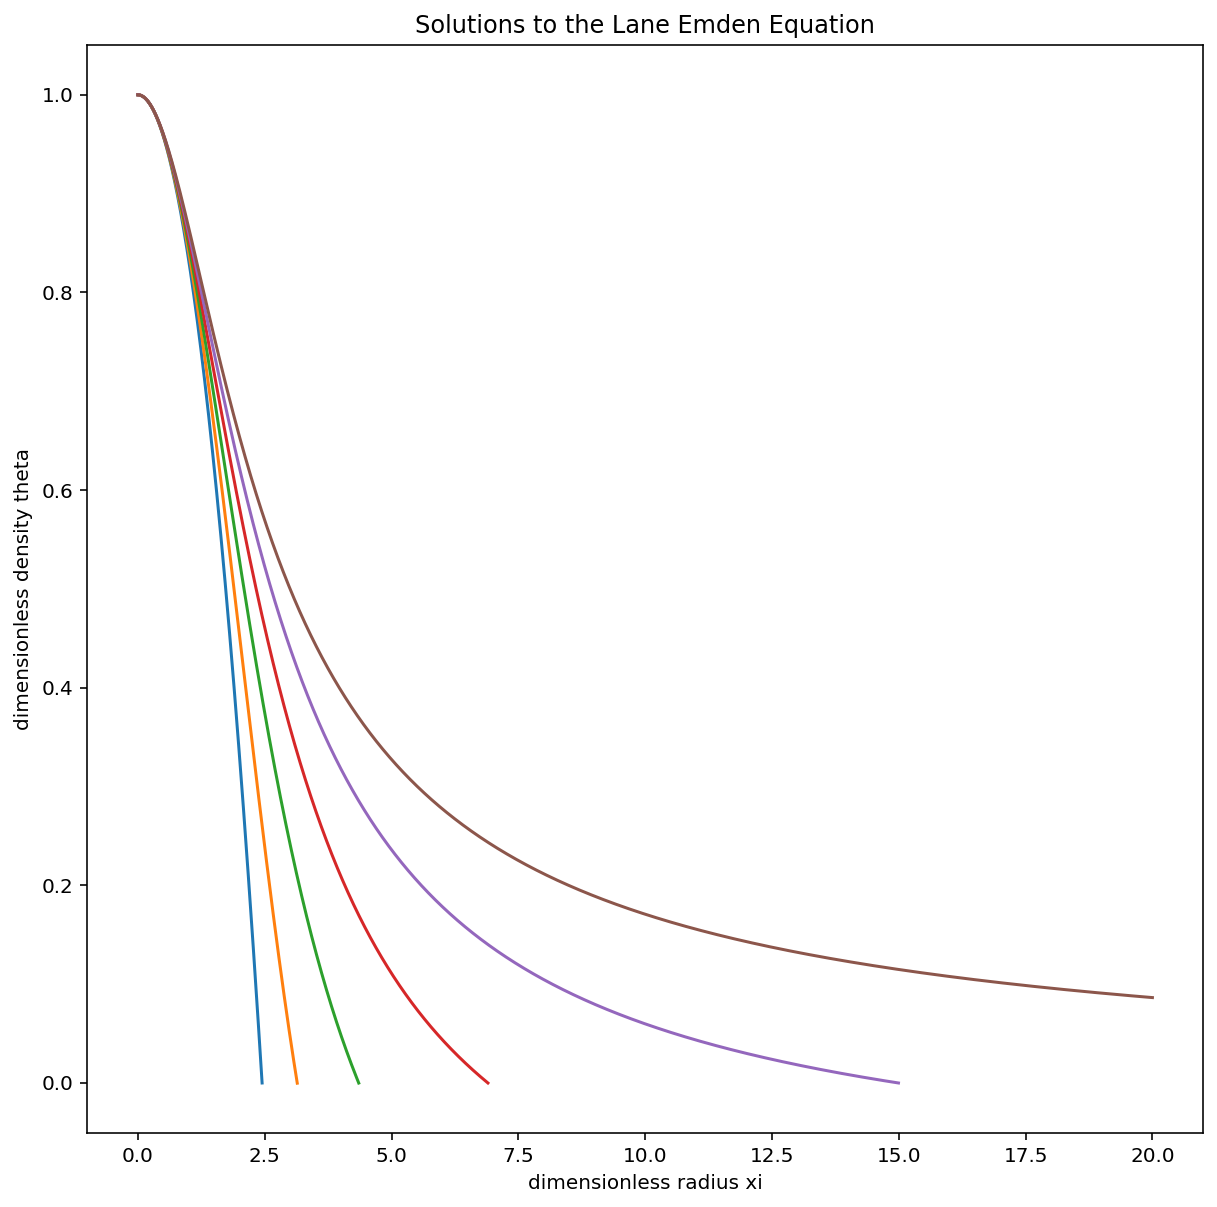

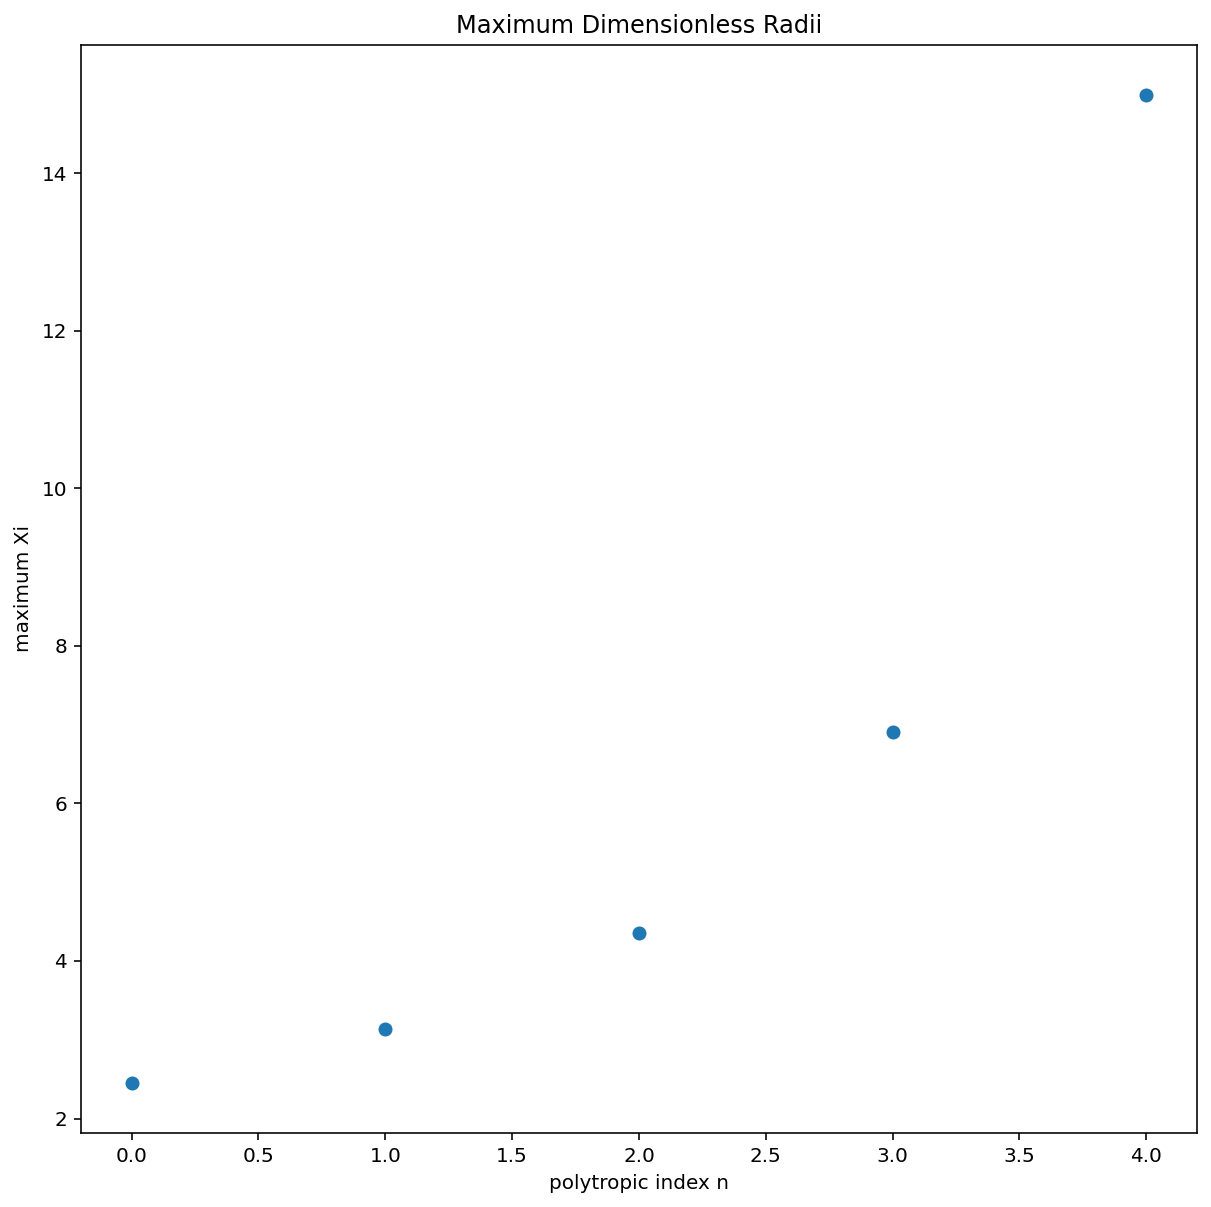

In [3]:
ns = [0, 1, 2, 3, 4, 5]
plt.figure(figsize=[10, 10])
xs = []
ys = []
xi_step = 1
xis = []
thetas = []
xis = []
thetas = []
dtheta_dxis_list = []
for n in ns:
    x_n, y_n, dthetas_n = lane_emden(n)
    #print(dthetas_n)
    xs.append(x_n)
    ys.append(y_n)
    xis.append(x_n)
    thetas.append(y_n)
    dtheta_dxi_ns = []
    for dtheta_n in dthetas_n:
        dtheta_dxi_ns.append(dtheta_n/xi_step)
    dtheta_dxis_list.append(dtheta_dxi_ns)
    plt.plot(x_n, y_n)
#print(len(dtheta_dxis))
plt.xlabel('dimensionless radius xi')
plt.ylabel('dimensionless density theta')
plt.title('Solutions to the Lane Emden Equation')
plt.show()

Ximaxs = []
short_n_list = [0, 1, 2, 3, 4]
Ximaxs.append(np.interp(0, ys[0], xs[0]))
Ximaxs.append(np.interp(0, ys[1], xs[1]))
Ximaxs.append(np.interp(0, ys[2], xs[2]))
Ximaxs.append(np.interp(0, ys[3], xs[3]))
Ximaxs.append(np.interp(0, ys[4], xs[4]))
plt.figure(figsize=[10, 10])
plt.scatter(short_n_list, Ximaxs)
plt.xlabel('polytropic index n')
plt.ylabel('maximum Xi')
plt.title('Maximum Dimensionless Radii')
plt.show()

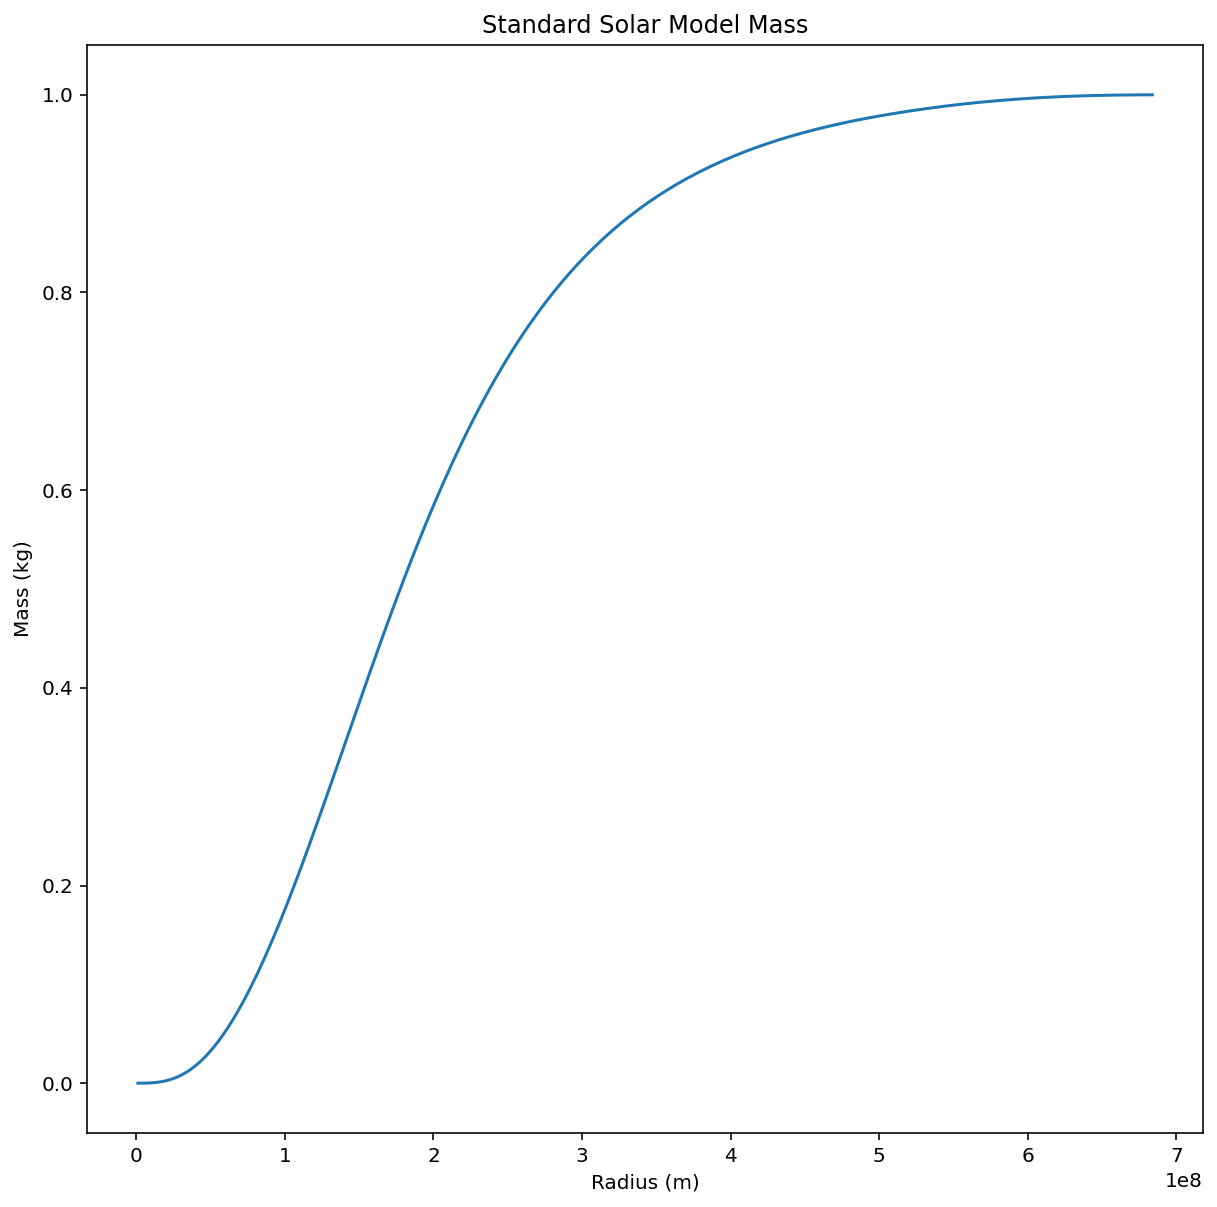

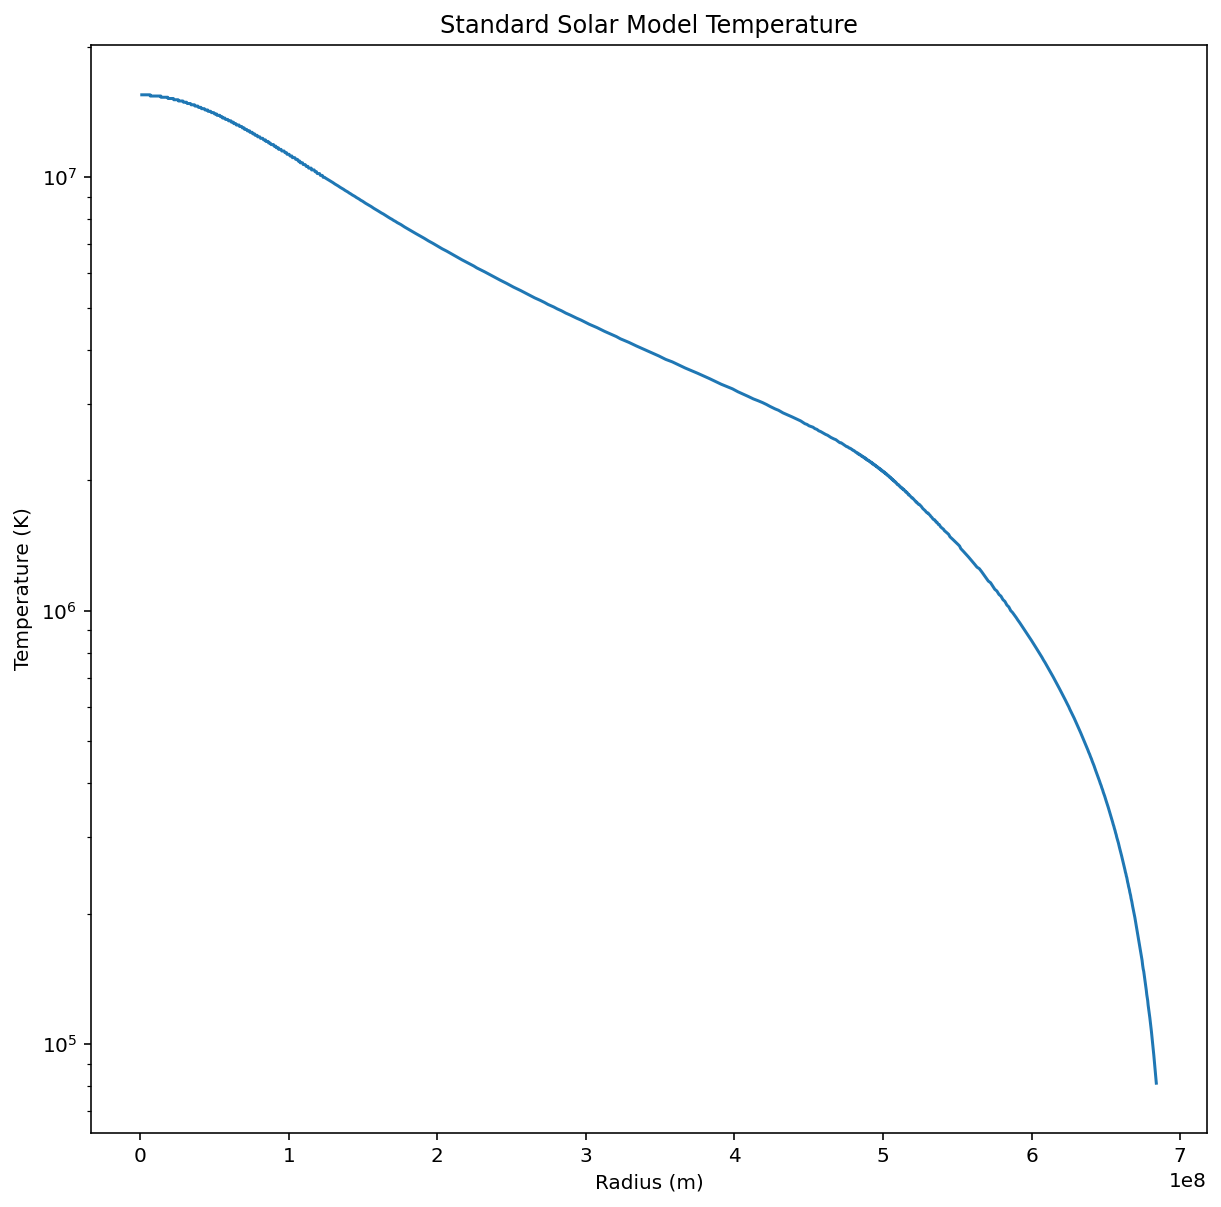

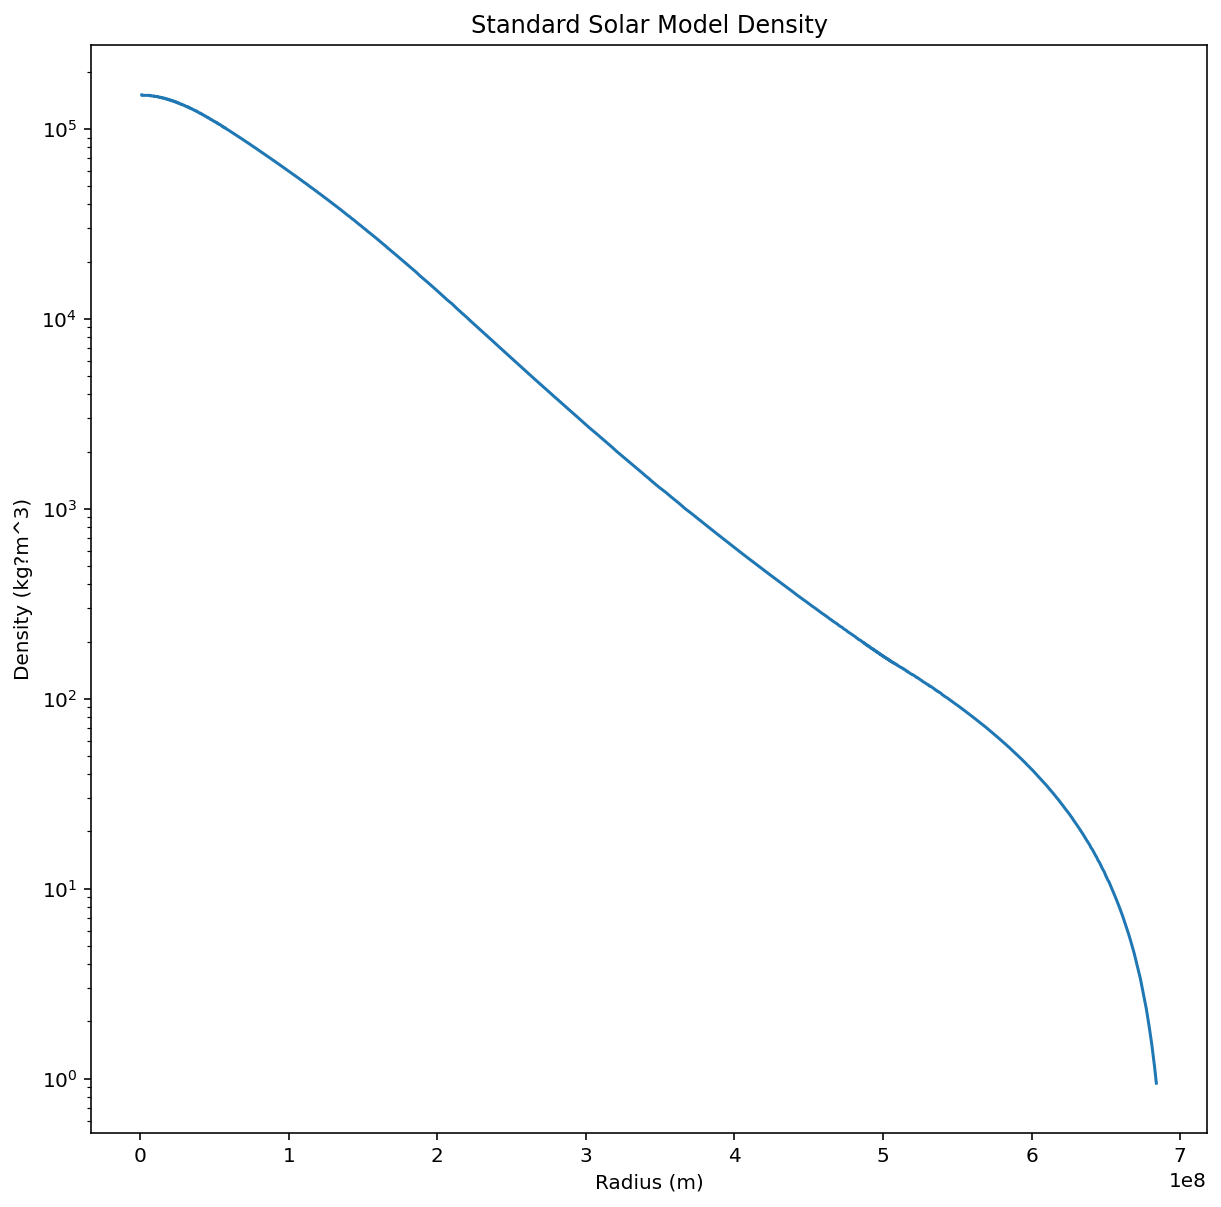

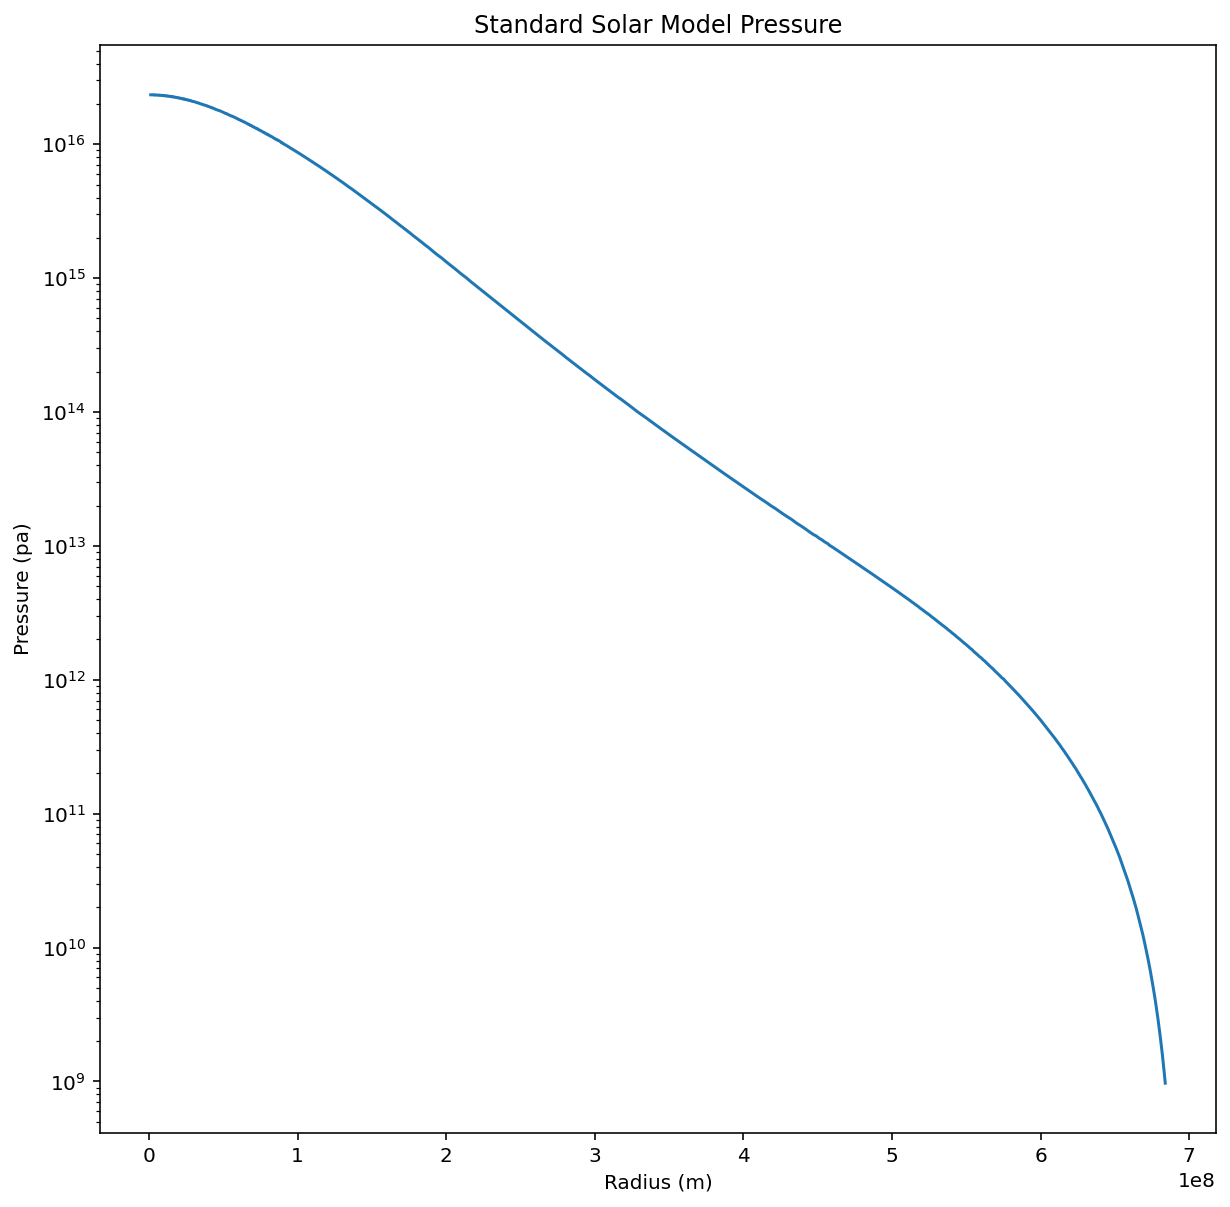

In [4]:
ssm = np.genfromtxt("ssm.txt")
Msun = 1.98847*10**30 # kg
Rsun = 6.957*10**8 # m
dyn = 10**(-5) # N
M_ssm = ssm[1:,0] * Msun # kg
R_ssm = ssm[1:,1] * Rsun # m
T_ssm = ssm[1:,2] # K
Rho_ssm = ssm[1:,3] * 10**(3) # kg/m^3
P_ssm = ssm[1:,4] * dyn * 10**(4) # pa
plt.figure(figsize=[10,10])
plt.plot(R_ssm, M_ssm/Msun)
plt.xlabel('Radius (m)')
plt.ylabel('Mass (kg)')
plt.title('Standard Solar Model Mass')
plt.show()
plt.figure(figsize=[10,10])
plt.semilogy(R_ssm, T_ssm)
plt.xlabel('Radius (m)')
plt.ylabel('Temperature (K)')
plt.title('Standard Solar Model Temperature')
plt.show()
plt.figure(figsize=[10,10])
plt.semilogy(R_ssm, Rho_ssm)
plt.xlabel('Radius (m)')
plt.ylabel('Density (kg?m^3)')
plt.title('Standard Solar Model Density')
plt.show()
plt.figure(figsize=[10,10])
plt.semilogy(R_ssm, P_ssm)
plt.xlabel('Radius (m)')
plt.ylabel('Pressure (pa)')
plt.title('Standard Solar Model Pressure')
plt.show()

695700000.0
n 0 alpha: 284075016.71091396 rho_c 1409.8437258570223
695700000.0
n 1 alpha: 221419407.56863287 rho_c 4640.668721121596
695700000.0
n 2 alpha: 159784069.87045565 rho_c 16092.491013212286
695700000.0
n 3 alpha: 100811461.98934554 rho_c 76552.8510886773
695700000.0


n 4 alpha: 46398556.32930351 rho_c 881751.5862105872


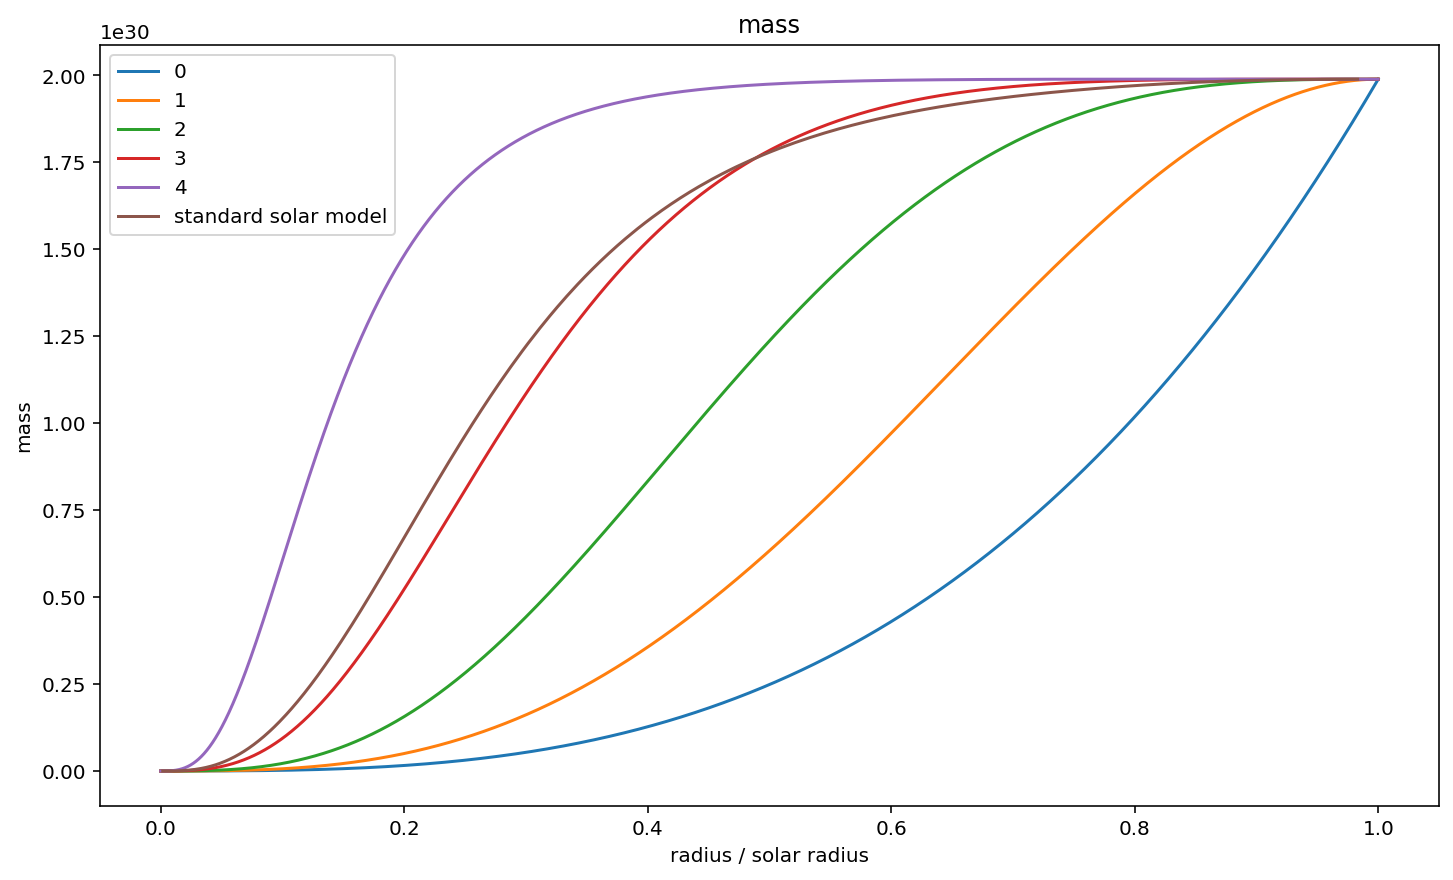

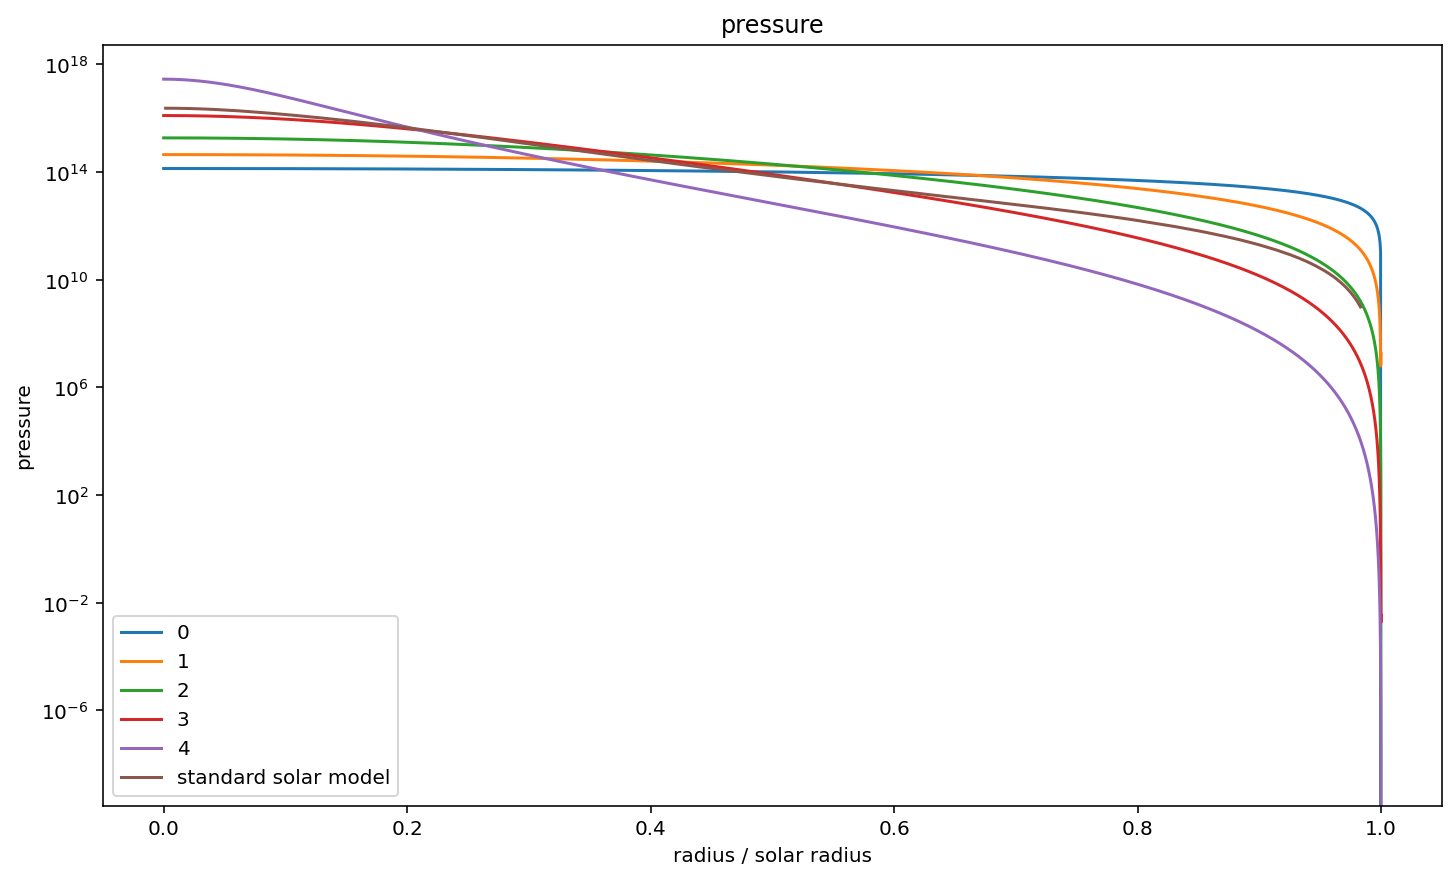

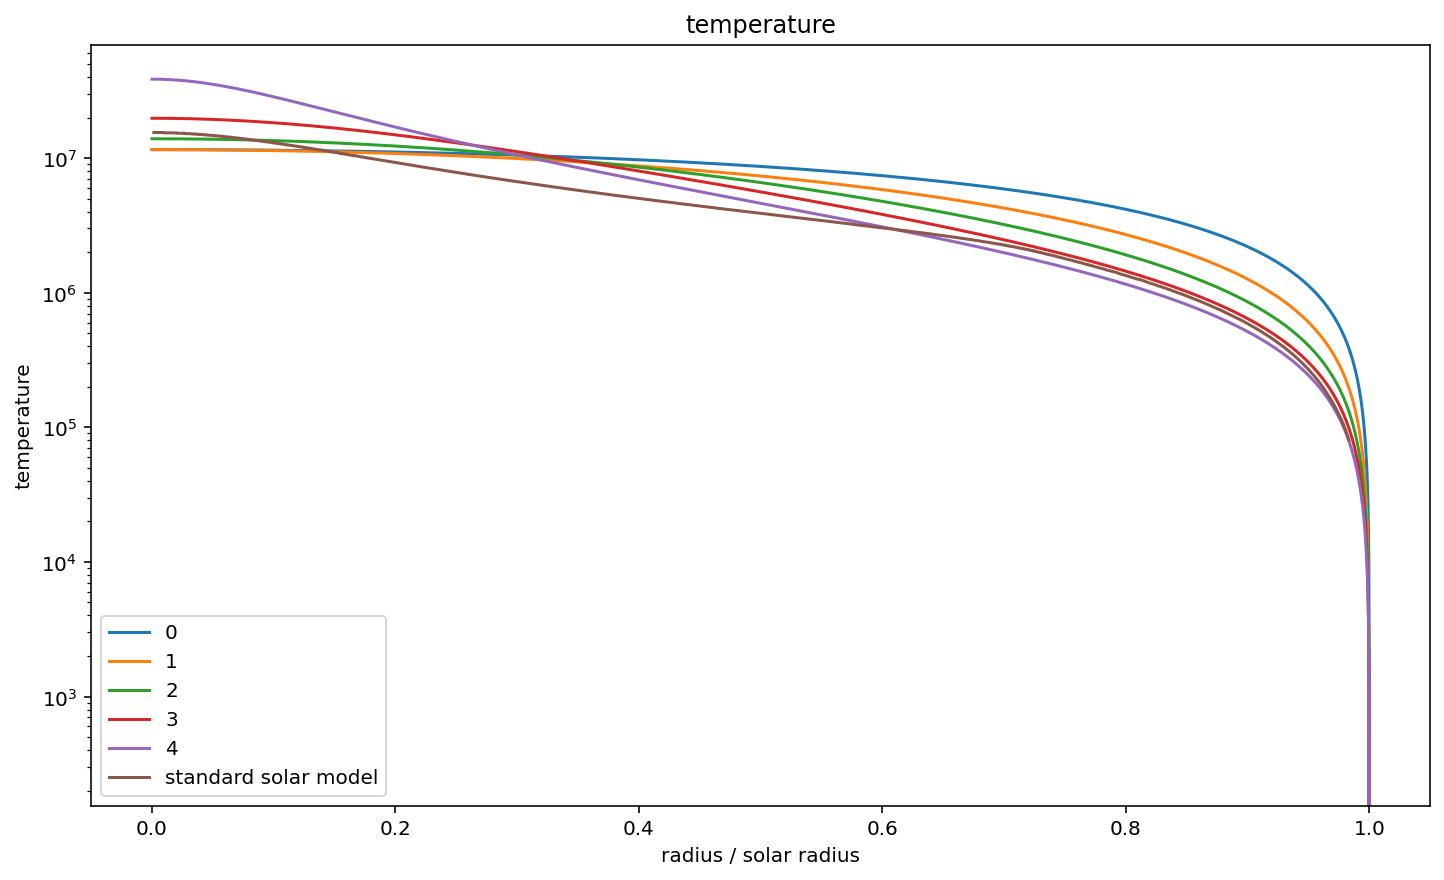

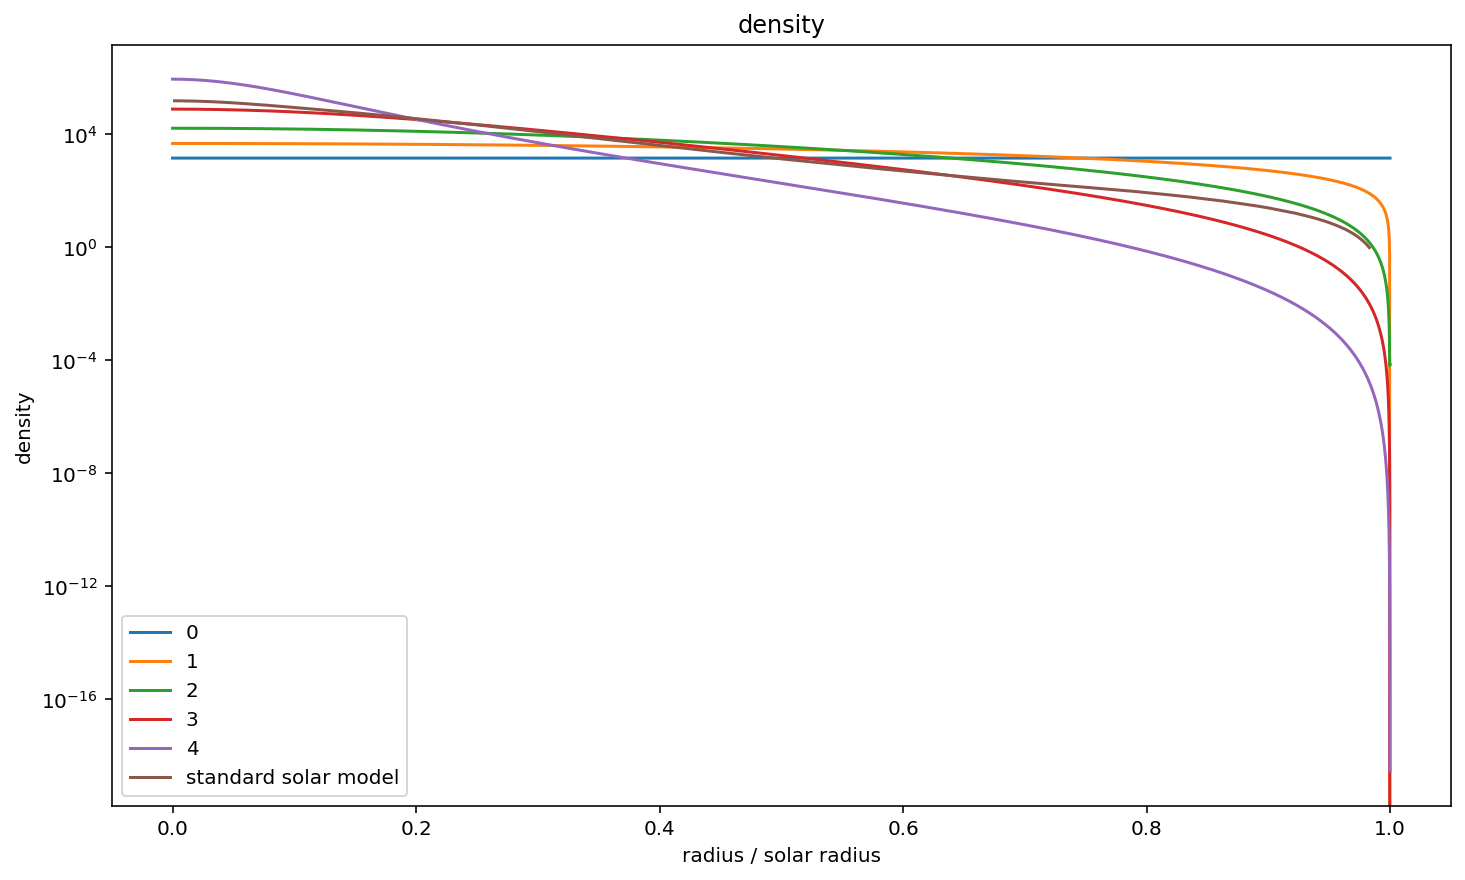

In [40]:
import matplotlib.pyplot as plt

def alpha_LE(radius_max, xi_max):
    # solves for the alpha of a specific lane emden fit
    print(radius_max)
    alpha = radius_max / xi_max
    return alpha

def rho_c_LE(rho_av, xi_max, dtheta_dxi_ximax):
    # solves for the central density from the lane emden equation
    dxi_dtheta_rmax = 1/dtheta_dxi_ximax
    xi_rmax = xi_max
    rho_c = -rho_av/3 * xi_rmax * dxi_dtheta_rmax
    return rho_c

def M_LE(alpha, rho_c, xi, theta, dtheta_dxi):
    # solves for the mass within a dimensionless radius from lane emden
    M = -4*np.pi * alpha**3 * rho_c * xi**2 * dtheta_dxi
    return M

def P_LE(alpha, rho_c, theta, n):
    """
    # solves for the pressure at some dimensionless radius from lane emden
    G = 6.67430*10**-1 # Nm^2/kg^2
    top = 4*np.pi*G * rho_c*rho_c * theta**(n+1) * alpha*alpha
    bottom = (n+1)
    P = top / bottom
    #P = K * (rho_c**((n+1)/n)) * (theta**(n+1))
    top = k * T * rho
    bottom = m_H * mu
    P = top / bottom
    """
    G = 6.67430*10**-11 # Nm^2/kg^2
    top = (alpha**2) * 4 * np.pi * G * (rho_c**2) * (theta**(n+1))
    bottom = n+1
    P = top/bottom
    return P

def T_LE(alpha, theta, rho_c, n, mu):
    """
    # solves for the temperature at some dimensionless radius from lane emden
    AMU = 1.66053906660*10**-27 # kg
    m_H = 1.0080*AMU # kg
    mu = 1 # this is a good enough approximation, but it does change and is in the dataset
    G = 6.67430*10**(-1) # Nm^2/kg^2
    k = 1.380649*10**(-23) # J/K^(−1)
    top = m_H*mu*4*np.pi*G * rho_c * theta * alpha*alpha
    bottom = k*(n+1)
    T = top/bottom
    """
    AMU = 1.66053906660*10**-27 # kg
    m_H = 1.0080*AMU # kg
    G = 6.67430*10**(-11) # Nm^2/kg^2
    k = 1.380649*10**(-23) # J/K^(−1)
    top = m_H * mu * (alpha**2) * 4 * np.pi * G * theta * rho_c
    bottom = (n+1) * k
    T = top/bottom
    return T

def rho_LE(n, rho_c, theta):
    rho = rho_c*(theta**n)
    return rho

def K_LE(n, alpha, rho_c):
    G = 6.67430*10**-1 # Nm^2/kg^2
    top = (alpha**2) * 4 * np.pi * G * (rho_c**((n-1)/n))
    bottom = n+1
    K = top/bottom
    return K

def solve_LE_params_for_n(n, xis, thetas, dtheta_dxis, xi_max):
    #print(dtheta_dxis)
    r_sun = 6.957e8 # m
    m_sun = 1.9885e30 # kg
    alpha = alpha_LE(r_sun, xi_max)
    rho_av = 3*m_sun / (4*np.pi*r_sun*r_sun*r_sun)
    rho_c = rho_c_LE(rho_av, xi_max, dtheta_dxis[-1])
    radii = []
    for xi in xis:
        radii.append(alpha*xi)
    masses = []
    pressures = []
    temperatures = []
    densities = []
    counter_max = len(xis)
    for i in range(counter_max):
        masses.append(M_LE(alpha, rho_c, xis[i], thetas[i], dtheta_dxis[i]))
        densities.append(rho_LE(n, rho_c, thetas[i]))
        temperatures.append(T_LE(alpha, thetas[i], rho_c, n, 1))
        pressures.append(P_LE(alpha, rho_c, thetas[i], n))
    print("n", n, "alpha:", alpha, "rho_c", rho_c)
    return radii, masses, pressures, temperatures, densities

def plot_LE_param(param_lists, radii_lists, title, xlabel, ylabel, R_ssm, param_ssm):
    for n in short_n_list:
        plt.semilogy(radii_lists[n], param_lists[n], label=str(n))
    plt.semilogy(R_ssm, param_ssm, label="standard solar model")
    plt.title(title)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_LE_M(param_lists, radii_lists, title, xlabel, ylabel, R_ssm, param_ssm):
    for n in short_n_list:
        plt.plot(radii_lists[n], param_lists[n], label=str(n))
    plt.plot(R_ssm, param_ssm, label="standard solar model")
    plt.title(title)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


radii_lists = []
mass_lists = []
pressure_lists = []
temperature_lists = []
density_lists = []
short_n_list = [0, 1, 2, 3, 4]
for n in short_n_list:
    rs, ms, ps, ts, rhos = solve_LE_params_for_n(n, xis[n], thetas[n], dtheta_dxis_list[n], Ximaxs[n])
    r2s = []
    for r in rs:
        r2s.append(r/Rsun)
    radii_lists.append(r2s)
    mass_lists.append(ms)
    pressure_lists.append(ps)
    temperature_lists.append(ts)
    density_lists.append(rhos)
plot_LE_M(mass_lists, radii_lists, "mass", "radius / solar radius", "mass", R_ssm/Rsun, M_ssm)
plot_LE_param(pressure_lists, radii_lists, "pressure", "radius / solar radius", "pressure", R_ssm/Rsun, P_ssm)
plot_LE_param(temperature_lists, radii_lists, "temperature", "radius / solar radius", "temperature", R_ssm/Rsun, T_ssm)
plot_LE_param(density_lists, radii_lists, "density", "radius / solar radius", "density", R_ssm/Rsun, Rho_ssm)

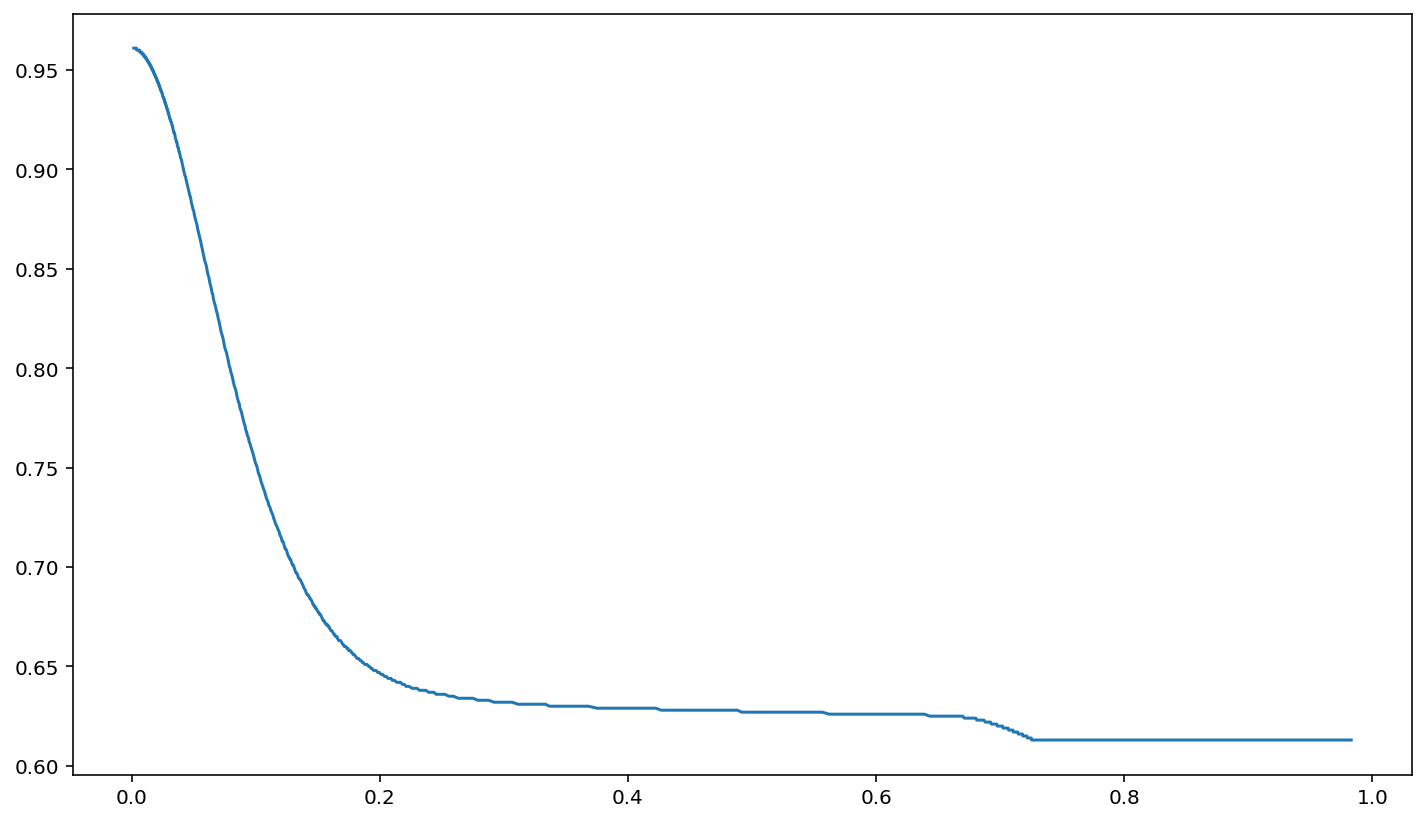

695700000.0


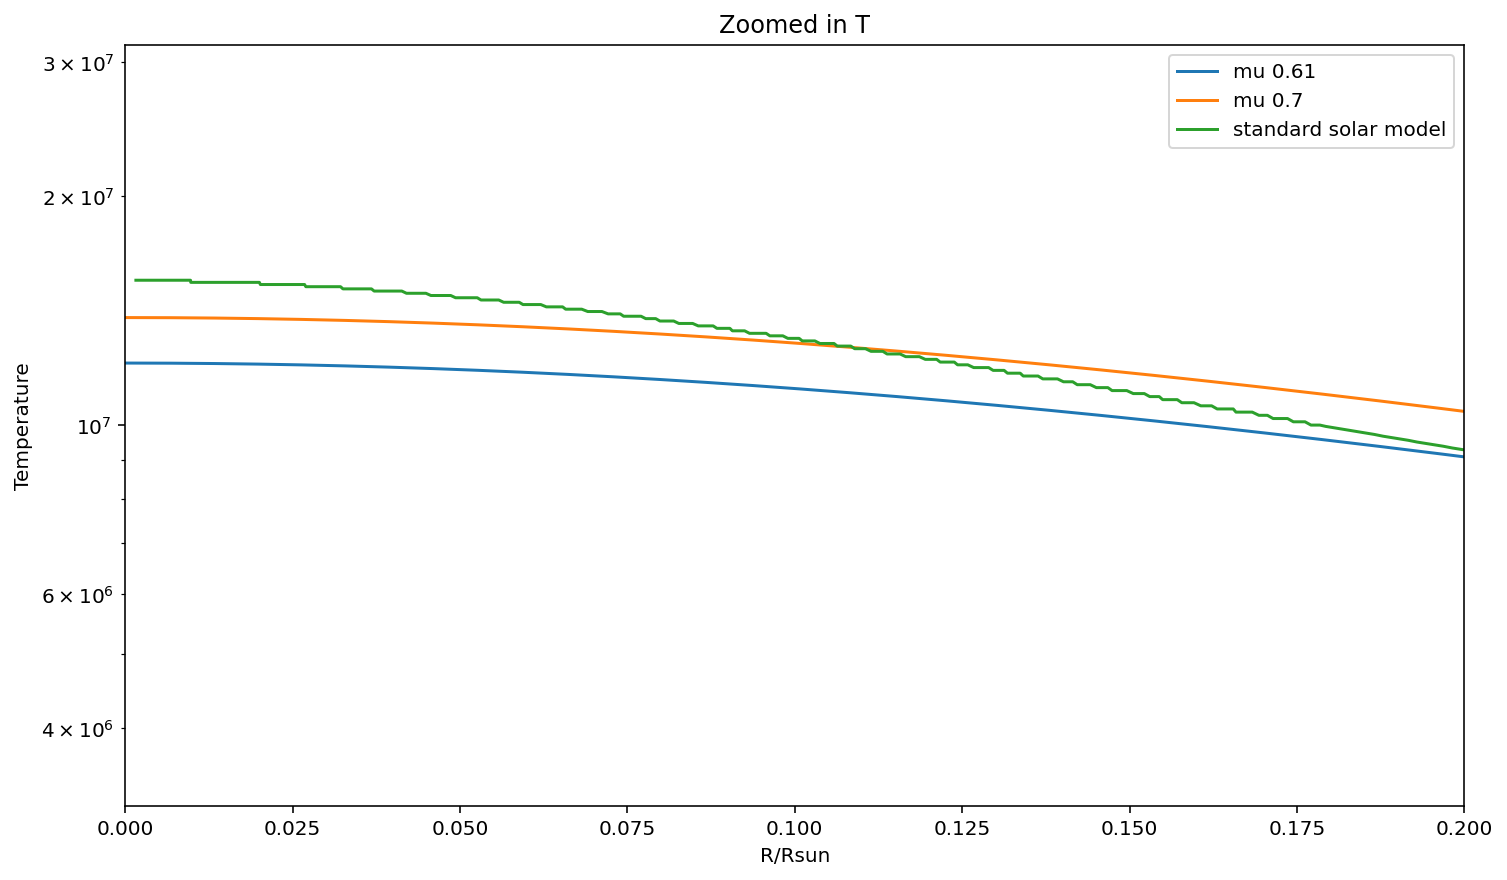

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mus():
    plt.figure()
    mu_ssm = ssm[1:,12]
    plt.plot(R_ssm/Rsun, mu_ssm)
    plt.show()

def solve_zoomed_in_T(n, xis, thetas, dtheta_dxis, xi_max):
    r_sun = 6.957e8 # m
    m_sun = 1.9885e30 # kg
    alpha = alpha_LE(r_sun, xi_max)
    rho_av = 3*m_sun / (4*np.pi*r_sun*r_sun*r_sun)
    rho_c = rho_c_LE(rho_av, xi_max, dtheta_dxis[-1])
    radii = []
    for xi in xis:
        radii.append(alpha*xi/Rsun)
    temperatures6 = []
    temperatures7 = []
    counter_max = len(xis)
    for i in range(counter_max):
        temperatures6.append(T_LE(alpha, thetas[i], rho_c, n, 0.61))
        temperatures7.append(T_LE(alpha, thetas[i], rho_c, n, 0.7))
    return radii, temperatures6, temperatures7

def plot_zoomed_in_T():
    plt.figure()
    n = 3
    radii, temperatures6, temperatures7 = solve_zoomed_in_T(n, xis[n], thetas[n], dtheta_dxis_list[n], Ximaxs[n])
    plt.semilogy(radii, temperatures6, label="mu 0.61")
    plt.semilogy(radii, temperatures7, label="mu 0.7")
    plt.semilogy(R_ssm/Rsun, T_ssm, label="standard solar model")
    plt.title("Zoomed in T")
    plt.legend()
    plt.xlabel("R/Rsun")
    plt.ylabel("Temperature")
    plt.xlim(0, 0.2)
    plt.ylim(10**(6.5), 10**(7.5))
    plt.show()


plot_mus()
plot_zoomed_in_T()